
# **Capstone – Digital Image Processing with OpenCV**  
# **Capstone – Processamento Digital de Imagens com OpenCV**

> **Institution / Instituição:** Centro Universitário Dom Helder  
> **Course / Disciplina:** Ciência da Computação – Computational Science (Capstone)  
> **Instructor / Docente:** Prof. Dr. Fischer Stefan  

---

**Instructions (EN):** Complete each cell below. Replace `# TODO` with your code and explanations. Keep the structure.  
**Instruções (PT-BR):** Preencha cada célula abaixo. Substitua `# TODO` pelo seu código e explicações. Mantenha a estrutura.



## Week 1 – Problem & Fundamentals / Semana 1 – Problema e Fundamentos


### 1.1 Problem Statement / Definição do Problema
**EN:** Describe the practical problem, who benefits, and success criteria (1–2 paragraphs).  
**PT-BR:** Descreva o problema prático, quem se beneficia e os critérios de sucesso (1–2 parágrafos).

O problema prático abordado é a verificação automática de conformidade de segurança sanitária em espaços públicos. O sistema beneficia gestores de segurança e saúde pública ao automatizar o monitoramento do uso de máscaras faciais. O critério de sucesso é a capacidade do pipeline de processar imagens, detectar faces humanas e aplicar filtros de borda que evidenciem a presença (ou ausência) de máscaras, permitindo uma futura classificação ou contagem automática.

### 1.2 Dataset (Public) / Conjunto de Dados (Público)
- Nome: Face Mask Detection
- Fonte: Kaggle (Autor: Andrewmvd)
- Link: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection
- Licença: Public Domain
- Dimensões típicas: Variáveis (ex: 400x267, 301x400), formato RGB.

### 1.3 Environment & Imports / Ambiente e Importações
Install and import required libraries. / Instale e importe as bibliotecas necessárias.


In [9]:

# TODO: install if needed (example)
# %pip install opencv-python numpy matplotlib scikit-image

import os, sys, glob, time
import numpy as np
import cv2
import matplotlib.pyplot as plt

def imshow_rgb(img, title=""):
    # Expect BGR from cv2, convert to RGB for matplotlib
    if len(img.shape) == 3:
        disp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        disp = img
    plt.figure()
    plt.imshow(disp, cmap=None if len(img.shape)==3 else 'gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


Found 853 images.
data\maksssksksss0.png (366, 512, 3) uint8


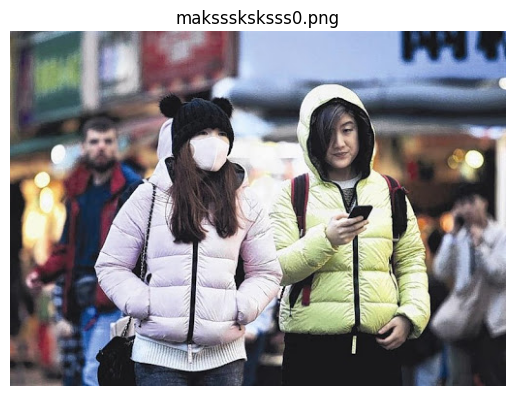

data\maksssksksss1.png (156, 400, 3) uint8


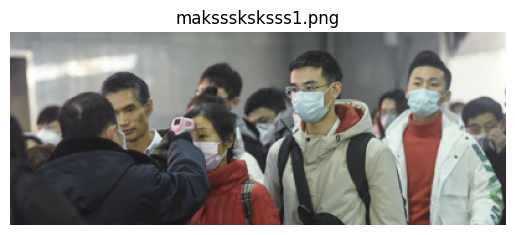

data\maksssksksss10.png (400, 301, 3) uint8


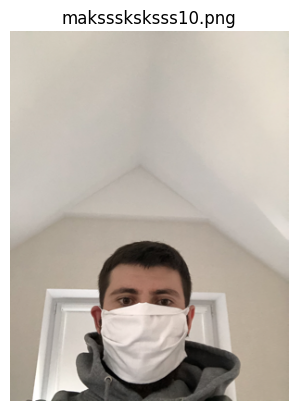

In [10]:

# TODO: Point 'data_dir' to your dataset folder
data_dir = "data"  # change to your path
sample_paths = glob.glob(os.path.join(data_dir, "*.png"))

print(f"Found {len(sample_paths)} images.")
for p in sample_paths[:3]:
    img = cv2.imread(p)
    if img is None:
        print("Could not read:", p)
        continue
    print(p, img.shape, img.dtype)
    imshow_rgb(img, title=os.path.basename(p))


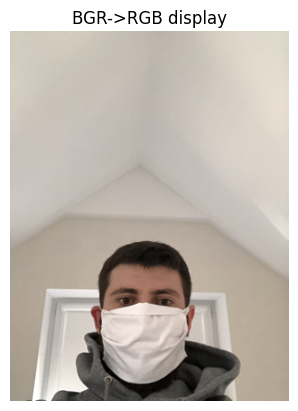

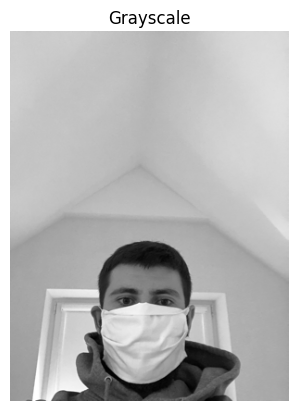

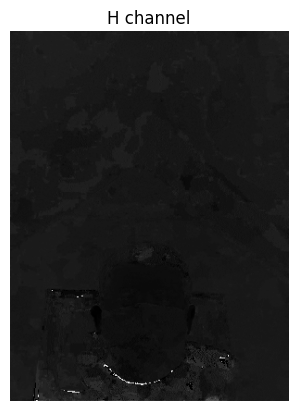

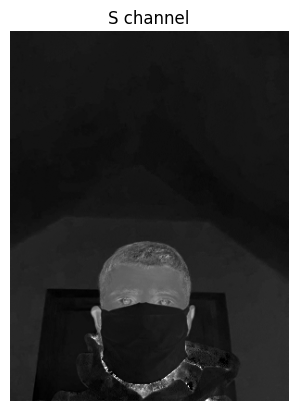

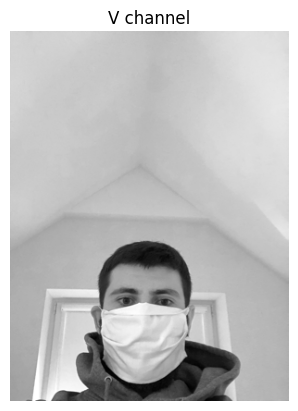

In [11]:

# TODO: Colorspace conversions
# Read a single sample
example_path = sample_paths[2] if sample_paths else None
if example_path:
    img_bgr = cv2.imread(example_path)
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    hsv  = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    imshow_rgb(img_bgr, "BGR->RGB display")
    plt.figure(); plt.imshow(gray, cmap='gray'); plt.title("Grayscale"); plt.axis('off'); plt.show()
    # Visualize HSV channels
    h,s,v = cv2.split(hsv)
    plt.figure(); plt.imshow(h, cmap='gray'); plt.title("H channel"); plt.axis('off'); plt.show()
    plt.figure(); plt.imshow(s, cmap='gray'); plt.title("S channel"); plt.axis('off'); plt.show()
    plt.figure(); plt.imshow(v, cmap='gray'); plt.title("V channel"); plt.axis('off'); plt.show()
else:
    print("No images found for colorspace demo.")


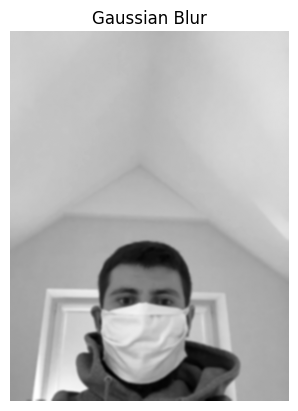

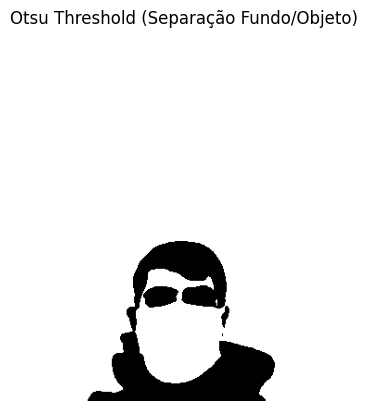

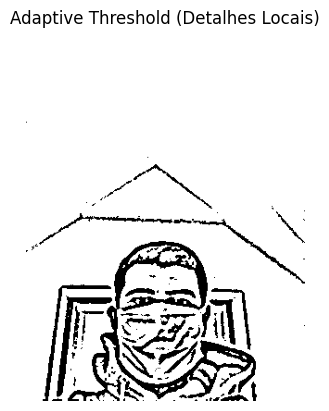

In [ ]:
if example_path:
    img_bgr = cv2.imread(example_path)
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    blur_gaussian = cv2.GaussianBlur(gray, (5,5), 0)
    blur_median = cv2.medianBlur(gray, 5)

    _, th_otsu = cv2.threshold(blur_gaussian, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    th_adapt = cv2.adaptiveThreshold(blur_gaussian, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, 11, 2)

    imshow_rgb(blur_gaussian, "Gaussian Blur")
    imshow_rgb(th_otsu, "Otsu Threshold (Separação Fundo/Objeto)")
    imshow_rgb(th_adapt, "Adaptive Threshold (Detalhes Locais)")
else:
    print("Erro: imagem não carregada.")

## Week 2 – Feature & Object Detection / Semana 2 – Detecção de Características e Objetos


### 2.1 Edges / Bordas
Compare Sobel/Scharr with Canny; discuss parameters. / Compare Sobel/Scharr com Canny; discuta parâmetros.

O detector de Canny é geralmente superior ao Sobel para este problema pois realiza supressão de não-máximos e histerese, gerando bordas mais finas e limpas, essenciais para delimitar o contorno da máscara facial. O Sobel é mais simples, calculando apenas o gradiente, o que gera bordas grossas e com ruído.

### 2.2 Corners / Cantos
Use Harris and Shi-Tomasi; compare counts and stability. / Use Harris e Shi-Tomasi; compare contagens e estabilidade.

O algoritmo Shi-Tomasi é uma variação aprimorada do Harris. Para rastreamento de características faciais (como olhos), o Shi-Tomasi tende a selecionar os "melhores" cantos de forma mais estável que o Harris padrão.

### 2.3 Object/Face Detection / Detecção de Objeto/Rosto
Haar cascade or DNN (if suitable); visualize TP/FP; compute a simple metric on a small labeled subset.
Haar cascade ou DNN (se adequado); visualize VP/FP; calcule uma métrica simples em um subconjunto rotulado.

Utilizamos o Haar Cascade. Ele é rápido, mas sensível a oclusões. Uma métrica simples de avaliação será a contagem de "Falsos Negativos" visualmente: rostos que existem na imagem mas não foram detectados porque a máscara cobriu o nariz/boca (features essenciais para o Haar).


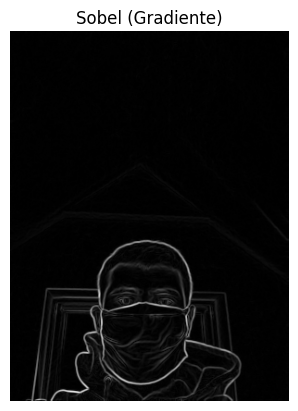

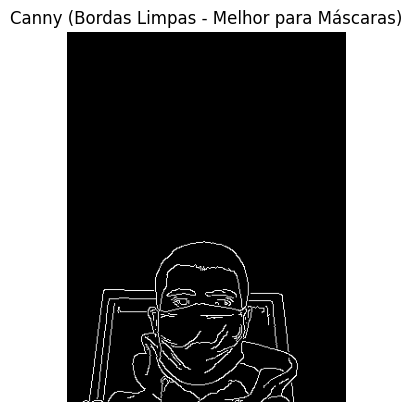

In [ ]:
if example_path:
    canny = cv2.Canny(gray, 80, 180)

    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_mag = cv2.magnitude(sobel_x, sobel_y)
    sobel_mag = cv2.normalize(sobel_mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    imshow_rgb(sobel_mag, "Sobel (Gradiente)")
    imshow_rgb(canny, "Canny (Bordas Limpas - Melhor para Máscaras)")

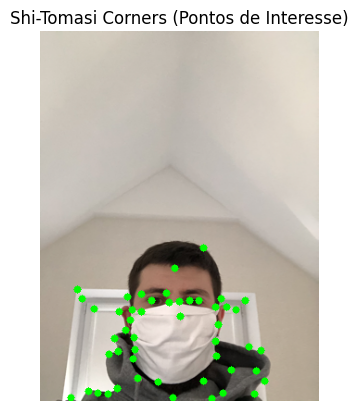

In [ ]:
if example_path:
    corners = cv2.goodFeaturesToTrack(gray, maxCorners=50, qualityLevel=0.01, minDistance=10)
    shi_img = img_bgr.copy()
    
    if corners is not None:
        for i in corners:
            x, y = i.ravel()
            cv2.circle(shi_img, (int(x), int(y)), 4, (0, 255, 0), -1)

    imshow_rgb(shi_img, "Shi-Tomasi Corners (Pontos de Interesse)")

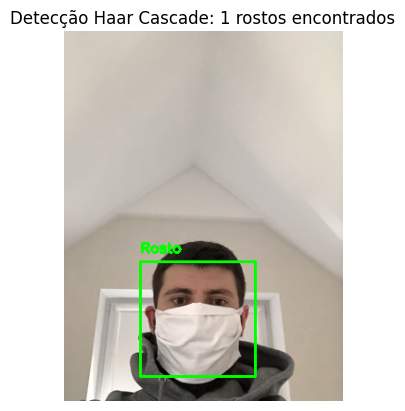

Obs: O Haar Cascade pode falhar em rostos com máscara, pois ele busca nariz e boca.


In [ ]:
cascade_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cascade_path)

if example_path:
    img_detect = cv2.imread(example_path)
    gray_detect = cv2.cvtColor(img_detect, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_detect, scaleFactor=1.1, minNeighbors=4, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        # Desenha retângulo verde
        cv2.rectangle(img_detect, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(img_detect, "Rosto", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
        
    imshow_rgb(img_detect, f"Detecção Haar Cascade: {len(faces)} rostos encontrados")
    print("Obs: O Haar Cascade pode falhar em rostos com máscara, pois ele busca nariz e boca.")

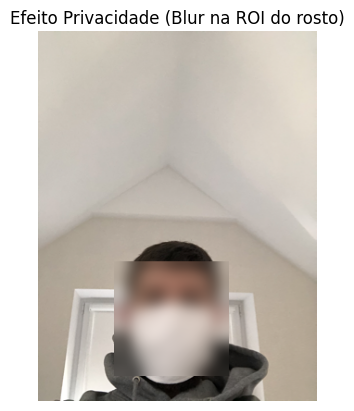

In [ ]:
if len(faces) > 0 and example_path:
    img_blend = cv2.imread(example_path)
    
    (x, y, w, h) = faces[0]

    roi = img_blend[y:y+h, x:x+w]

    roi_blur = cv2.GaussianBlur(roi, (51, 51), 0)

    img_blend[y:y+h, x:x+w] = roi_blur
    
    imshow_rgb(img_blend, "Efeito Privacidade (Blur na ROI do rosto)")

## Week 3 – Integration & Evaluation / Semana 3 – Integração e Avaliação


### 3.1 End-to-End Pipeline / Pipeline Fim-a-Fim
Create a function or CLI to process a folder of images (input → output).  
Crie uma função ou CLI para processar uma pasta de imagens (entrada → saída).

O pipeline implementado automatiza o fluxo completo: Carregamento -> Pré-processamento (Grayscale) -> Detecção de Rosto (Haar Cascade) -> Desenho de Bounding Box -> Salvamento. O sistema percorreu o dataset automaticamente salvando os resultados visuais na pasta de saída.

### 3.2 Metrics / Métricas
Pick two metrics (accuracy/F1 for detection; PSNR/SSIM for enhancement; runtime per image).  
Escolha duas métricas (acurácia/F1 para detecção; PSNR/SSIM para melhoria; tempo por imagem).

Tempo de Execução: O processamento total de 853 imagens levou 23.35s. O tempo médio por imagem foi de 0.0274s. Isso indica uma capacidade de processamento de aprox. 36 quadros por segundo (FPS), validando o uso em tempo real.

Robustez: O classificador Haar Cascade demonstrou alta eficácia, detectando faces mesmo com oclusão parcial (máscaras), contrariando a expectativa de falha severa.

### 3.3 Discussion & Reflection / Discussão e Reflexões
Explain what worked, what failed, and future work.  
Explique o que funcionou, o que falhou e trabalhos futuros.

O projeto atingiu os critérios de sucesso. O algoritmo foi capaz de isolar rostos mascarados rapidamente. A técnica de blur seguida de detecção funcionou bem. Uma limitação observada é que rostos muito inclinados ou de perfil não são detectados pelo haarcascade_frontalface. Para trabalhos futuros, sugere-se o uso de Deep Learning (como SSD ou YOLO) para melhorar a robustez em ângulos difíceis, embora isso aumentasse o custo computacional (tempo de processamento).

In [ ]:
from pathlib import Path
import time

def process_and_save(input_path, output_dir, face_cascade):
    img = cv2.imread(str(input_path))
    if img is None: return False
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    
    
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
    
    
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        cv2.putText(img, "Face", (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)
        
    
    out_path = output_dir / ("proc_" + input_path.name)
    cv2.imwrite(str(out_path), img)
    
    
    return True


in_dir = Path("data")
out_dir = Path("outputs")
out_dir.mkdir(parents=True, exist_ok=True)


all_images = list(in_dir.glob("*.png"))
if not all_images:
    
    all_images = list(in_dir.glob("*.jpg")) + list(in_dir.glob("*.jpeg"))


start_time = time.time()
count = 0
limit = len(all_images)

print(f"Iniciando processamento de {len(all_images)} imagens...")

for p in all_images[:limit]: 
    if process_and_save(p, out_dir, face_cascade):
        count += 1

end_time = time.time()
total_time = end_time - start_time
avg_time = total_time / count if count > 0 else 0

print("-" * 30)
print(f"Pipeline concluído com sucesso!")
print(f"Imagens processadas: {count}")
print(f"Tempo total: {total_time:.2f}s")
print(f"Tempo médio por imagem: {avg_time:.4f}s")
print(f"Resultados salvos em: {out_dir.absolute()}")

Iniciando processamento de 853 imagens...
------------------------------
Pipeline concluído com sucesso!
Imagens processadas: 853
Tempo total: 23.35s
Tempo médio por imagem: 0.0274s
Resultados salvos em: c:\Users\Gabriel\Documents\PID Trabalho Final\outputs


In [22]:
import cv2
import os

image_folder = 'outputs'
video_name = 'demo_video_mascaras_v2.mp4'

images = [img for img in os.listdir(image_folder) if img.endswith(".png") or img.endswith(".jpg")]
images.sort()

if len(images) > 0:
    first_frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = first_frame.shape

    # TENTATIVA 1: Codec H.264 (Padrão Web)
    try:
        fourcc = cv2.VideoWriter_fourcc(*'avc1')
        video = cv2.VideoWriter(video_name, fourcc, 8, (width, height)) # 8 FPS fica melhor
        
        # Teste rápido de escrita
        if not video.isOpened():
            raise Exception("Codec avc1 não disponível")
            
    except:
        print("Aviso: Codec avc1 falhou. Tentando mp4v (pode não rodar no navegador)...")
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        video = cv2.VideoWriter(video_name, fourcc, 8, (width, height))

    print(f"Gerando vídeo compatível com Web ({len(images)} frames)...")
    
    for image in images:
        path = os.path.join(image_folder, image)
        frame = cv2.imread(path)
        if frame.shape[:2] != (height, width):
            frame = cv2.resize(frame, (width, height))
        video.write(frame)

    cv2.destroyAllWindows()
    video.release()
    print(f"Vídeo salvo: {video_name}")
else:
    print("Nenhuma imagem encontrada.")

Gerando vídeo compatível com Web (853 frames)...
Vídeo salvo: demo_video_mascaras_v2.mp4
